In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import altair as alt

In [2]:
pd.options.display.max_columns = 999

In [3]:
plt.rcParams['figure.figsize'] = (10,6)

## Week 9B: OpenStreetMap, Urban Networks, and Interactive Web Maps
Nov 3, 2021

## The final project

https://github.com/MUSA-550-Fall-2021/final-project

## This week: OpenStreetMap (OSM)

Three parts:
- **OSMnx:** downloading and manipulating streets as networks
- **Pandana:** networks focused on accessibility of amenities, e.g., walking distances to the nearest amenities
- **Related:** interactive web maps in Python



In [4]:
import osmnx as ox

## Part 3: Interactive maps in Python

Haven't we already done this?

## Yes!

We've used hvplot, holoviews, datashader, etc. to create interactive map-based visualizations

## Why do we need something more?

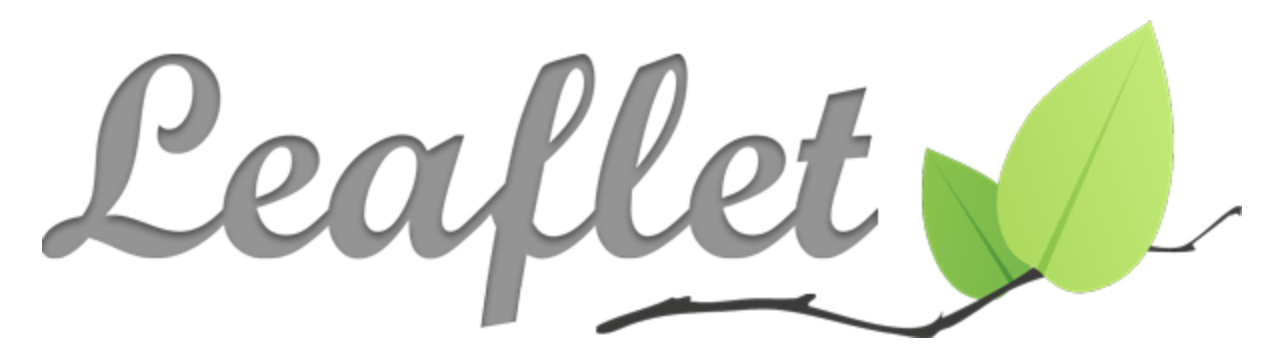</img>

## The benefits of Leaflet

- The leading open-source mapping library
- Simple and powerful
- Leverage the open-source community and lots of powerful plugins

## Folium: Leaflet in Python

**Pros**
- Create Leaflet.js maps directly from Python
- Combine power of Leaflet.js with the data wrangling ease of Python

**Cons**
- A wrapper for **most, but not all** of Leaflet's functionality
- Can be difficult to debug and find errors

## Revisiting routing with OSMnx

OSMnx leverages Folium under the hood to make interactive graphs of street networks!

**Key function:** `ox.plot_graph_folium` will make an interactive map of the graph object

Load the street network around City Hall

In [5]:
G = ox.graph_from_address('City Hall, Philadelphia, USA', 
                          dist=1500, 
                          network_type='drive')

In [6]:
# plot the street network with folium
graph_map = ox.plot_graph_folium(G, 
                                 popup_attribute='name', 
                                 edge_width=2)

/Users/nhand/opt/miniconda3/envs/musa-550-fall-2021/lib/python3.8/site-packages/osmnx/folium.py:67: UserWarning: `edge_width` has been deprecated and will be removed: use kwargs instead
  warn("`edge_width` has been deprecated and will be removed: use kwargs instead")


In [7]:
ox.plot_graph_folium?

And now save the map object and load it into the Jupyter notebook

In [8]:
from IPython.display import IFrame # loads HTML files

In [9]:
filepath = 'graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

### Note

Folium map objects are *supposed* to render automatically in the Jupyter notebook, so if you output a Folium map from a notebook cell, it will render. 

However, there a lot of times when the map won't show up properly, especially if the map has a large amount of data. Saving the file locally and loading it to the notebook via an IFrame will always work.

In [10]:
type(graph_map)

folium.folium.Map

In [11]:
graph_map

## Exercise: shortest route between the Liberty Bell and Art Museum

Let's calculate the shortest route between [the Art Museum](https://www.openstreetmap.org/way/28533972) and the [Liberty Bell](https://www.openstreetmap.org/node/1207480649).

See last lecture (Lecture 9A) for a guide!

### Step 1: Download amenity info from OSM using OSMnx

Use OSMnx to download all amenities in Philadelphia of type "tourism".

- The `ox.geometries_from_place()` can download OSM features with a specific tag
- Consult the OSM pages ([the Art Museum](https://www.openstreetmap.org/way/28533972) and [Liberty Bell](https://www.openstreetmap.org/node/1207480649)) for each feature for additional info
- Both features are categorized as "tourism" in the OSM data — use the "tags" keyword to select this category

In [12]:
ox.geometries_from_place?

In [13]:
philly_tourism = ox.geometries_from_place("Philadelphia, PA", tags={"tourism": True})

In [14]:
len(philly_tourism)

473

In [15]:
philly_tourism.head()

geometry  ele gnis:county_id  \
element_type osmid                                                       
node         357371322  POINT (-75.19580 39.96970)   17            101   
             360500844  POINT (-75.19582 39.95352)  NaN            NaN   
             360542779  POINT (-75.18932 39.95540)  NaN            NaN   
             360777728  POINT (-75.19021 39.95230)  NaN            NaN   
             360777735  POINT (-75.19166 39.95123)  NaN            NaN   

                       gnis:created gnis:feature_id gnis:state_id  \
element_type osmid                                                  
node         357371322   08/23/2007         2347097            42   
             360500844          NaN             NaN           NaN   
             360542779          NaN             NaN           NaN   
             360777728          NaN             NaN           NaN   
             360777735          NaN             NaN           NaN   

                                                                     name  \
element_type osmid                                                          
node         357371322                              Bird Lake Picnic Area   
             360500844                                 Hilton Inn at Penn   
             360542779                              Mario the Magnificent   
             360777728  Pennsylvania Historical Marker: ENIAC, first a...   
             360777735                             John Harrison, Chemist   

                            tourism operator artwork_type   wikidata  \
element_type osmid                                                     
node         357371322  picnic_site      NaN          NaN        NaN   
             360500844        hotel   Hilton          NaN        NaN   
             360542779      artwork      NaN       statue  Q98563440   
             360777728  information      NaN          NaN        NaN   
             360777735      artwork      NaN       statue        NaN   

                       information addr:state gnis:county_name  \
element_type osmid                                               
node         357371322         NaN        NaN              NaN   
             360500844         NaN        NaN              NaN   
             360542779         NaN        NaN              NaN   
             360777728       board        NaN              NaN   
             360777735         NaN        NaN              NaN   

                       gnis:import_uuid gnis:reviewed source brand  \
element_type osmid                                                   
node         357371322              NaN           NaN    NaN   NaN   
             360500844              NaN           NaN    NaN   NaN   
             360542779              NaN           NaN    NaN   NaN   
             360777728              NaN           NaN    NaN   NaN   
             360777735              NaN           NaN    NaN   NaN   

                       brand:wikidata brand:wikipedia  fee artist_name  \
element_type osmid                                                       
node         357371322            NaN             NaN  NaN         NaN   
             360500844            NaN             NaN  NaN         NaN   
             360542779            NaN             NaN  NaN         NaN   
             360777728            NaN             NaN  NaN         NaN   
             360777735            NaN             NaN  NaN         NaN   

                       wheelchair wikipedia alt_name addr:city historic  \
element_type osmid                                                        
node         357371322        NaN       NaN      NaN       NaN      NaN   
             360500844        NaN       NaN      NaN       NaN      NaN   
             360542779        NaN       NaN      NaN       NaN      NaN   
             360777728        NaN       NaN      NaN       NaN      NaN   
             360777735        NaN       NaN      NaN       NaN      NaN

### Step 2: Identify the Art Museum and Liberty Bell geometries

You should notice we have the building footprint for the Art Museum (a polygon geometry) and the point location for the Liberty Bell.

- The names of the features are "Philadelphia Museum of Art" and "Liberty Bell" — you can identify these names using the OSM website
- The `.squeeze()` function can be useful for converting to a Series object from a DataFrame of length 1

In [16]:
# How to find the name of the POI: search for keywords
philly_tourism.loc[philly_tourism['name'].str.contains("Art", na=False)]

geometry  \
element_type osmid                                                           
node         367974278                          POINT (-75.15240 40.03748)   
             4064343335                         POINT (-75.22112 40.02427)   
             5368454121                         POINT (-75.19477 39.95406)   
             5718906477                         POINT (-75.13058 39.99573)   
             6639391809                         POINT (-75.16088 39.96383)   
             6680708848                         POINT (-75.16833 39.94733)   
way          28533972    POLYGON ((-75.18116 39.96467, -75.18138 39.964...   
             333931830   POLYGON ((-75.16410 39.95543, -75.16416 39.955...   
             988345364   POLYGON ((-75.21924 40.08337, -75.21934 40.083...   

                         ele gnis:county_id gnis:created gnis:feature_id  \
element_type osmid                                                         
node         367974278    61            NaN          NaN         2349240   
             4064343335  NaN            NaN          NaN             NaN   
             5368454121  NaN            NaN          NaN             NaN   
             5718906477  NaN            NaN          NaN             NaN   
             6639391809  NaN            NaN          NaN             NaN   
             6680708848  NaN            NaN          NaN             NaN   
way          28533972     32            NaN          NaN             NaN   
             333931830    13            NaN          NaN         1196718   
             988345364    84            NaN          NaN         2350852   

                        gnis:state_id                                   name  \
element_type osmid                                                             
node         367974278            NaN         La Salle University Art Museum   
             4064343335           NaN             Soft Illusions Art Gallery   
             5368454121           NaN          Institute of Contemporary Art   
             5718906477           NaN             Art Making Machine Studios   
             6639391809           NaN      Philadelphia Museum of Jewish Art   
             6680708848           NaN               Romanian Folk Art Museum   
way          28533972             NaN             Philadelphia Museum of Art   
             333931830            NaN  Pennsylvania Academy of the Fine Arts   
             988345364            NaN                    Woodmere Art Museum   

                         tourism operator artwork_type   wikidata information  \
element_type osmid                                                              
node         367974278    museum      NaN          NaN  Q16893816         NaN   
             4064343335  gallery      NaN          NaN        NaN         NaN   
             5368454121   museum      NaN          NaN        NaN         NaN   
             5718906477  gallery      NaN          NaN        NaN         NaN   
             6639391809   museum      NaN          NaN        NaN         NaN   
             6680708848   museum      NaN          NaN        NaN         NaN   
way          28533972     museum      NaN          NaN    Q510324         NaN   
             333931830    museum      NaN          NaN   Q1952033         NaN   
             988345364    museum      NaN          NaN   Q2424929         NaN   

                        addr:state gnis:county_name  \
element_type osmid                                    
node         367974278          PA     Philadelphia   
             4064343335         PA              NaN   
             5368454121        NaN              NaN   
             5718906477         PA              NaN   
             6639391809        NaN              NaN   
             6680708848        NaN              NaN   
way          28533972           PA              NaN   
             333931830          PA              NaN   
             988345364          PA     Philadel

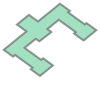

In [17]:
art_museum = philly_tourism.query("name == 'Philadelphia Museum of Art'").squeeze()

art_museum.geometry

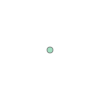

In [18]:
liberty_bell = philly_tourism.query("name == 'Liberty Bell'").squeeze()

liberty_bell.geometry

### Step 3: Extract the lat and lng coordinates

For the Art Museum geometry, we can use the `.geometry.centroid` attribute to calculate the centroid of the building footprint. 

**Remember:** we need the coordinates in the order of (latitude, longitude)

In [19]:
liberty_bell_x = liberty_bell.geometry.x
liberty_bell_y = liberty_bell.geometry.y

In [20]:
art_museum_x = art_museum.geometry.centroid.x
art_museum_y = art_museum.geometry.centroid.y

### Step 4: Find the nearest nodes on our OSMnx graph

Use the street network graph around City Hall and the `ox.get_nearest_node()` function to find the starting and ending nodes for the trip.

In [21]:
# Get the origin node
orig_node = ox.distance.nearest_nodes(G, liberty_bell_x, liberty_bell_y) 

# Get the destination node
dest_node = ox.distance.nearest_nodes(G, art_museum_x, art_museum_y) 

### Step 5: Use `networkx` to find the shortest path between nodes

The `nx.shortest_path()` will do the calculation for you!

In [22]:
import networkx as nx

In [23]:
# Calculate the shortest path between these nodes
route = nx.shortest_path(G, orig_node, dest_node)

In [24]:
route

[3408446156,
 110217312,
 109814427,
 109825548,
 109825559,
 109809258,
 109825575,
 109825606,
 109789819,
 775433860,
 110232279,
 646149049,
 110232451,
 109755755,
 109744095,
 109792682,
 775896555,
 775896556,
 110329757,
 110329738,
 110329851,
 110125895,
 534969088,
 109745905,
 109740423,
 110330569,
 550175455,
 550175399]

## Example: interactive maps of network routes

Now, we can overlay the shortest route between two nodes on the folium map.

**Key function**: use `ox.plot_route_folium` to plot the route.

In [25]:
# plot the route with folium
route_map = ox.plot_route_folium(G, route)

In [26]:
filepath = 'route.html'
route_map.save(filepath)
IFrame(filepath, width=600, height=500)

We can also add the underlying street network graph

In [27]:
# plot the route with folium on top of the previously created graph_map
route_graph_map = ox.plot_route_folium(G, route, route_map=graph_map)

In [28]:
# save as html file then display map as an iframe
filepath = 'route_graph.html'
route_graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

Note the `Leaflet` annotation in the bottom right corner of the maps...

## Getting started with Folium

**Things we'll cover:**
1. Creating a base map with tiles
1. Overlaying GeoJSON polygons
1. Plotting an interactive choropleth

In [29]:
import folium

## 3.1 Creating a Folium map

**Key function:** `folium.Map`

### Lots of configuration options

Some key ones: 
- **location**: the center location of the map
- **zoom_start**: the initial zoom level of the map
- **tiles**: the name of the tile provider 

Let's take a look at the help message:

In [30]:
folium.Map?

### The default tiles: OpenStreetMap

In [31]:
# let's center the map on Philadelphia
m = folium.Map(
    location=[39.99, -75.13],
    zoom_start=11
)

m

In [32]:
m = folium.Map(
    location=[39.99, -75.13],
    zoom_start=11,
     tiles='stamenwatercolor'
)

m

### Using custom tile sets

- Many sites provide free tile sets for download
- Just need the URL of the tile server
- Very useful demo of tile providers: https://leaflet-extras.github.io/leaflet-providers/preview

Let's try out the ESRI World Map:

**Important: for custom tile providers, you need to specify the attribution too!** 

In [33]:
tile_url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}'
attr = 'Tiles &copy; Esri &mdash; Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012'

In [34]:
m = folium.Map(
    location=[39.99, -75.13],
    zoom_start=11,
    tiles=tile_url,
    attr=attr
)

m

## 3.2 Overlaying GeoJSON on a folium map

**Key function:** `folium.GeoJson`

**Key parameters:**
- `style_function`: set the default style of the features
- `highlight_function`: set the style when the mouse hovers over the features 
- `tooltip`: add a tooltip when hovering over a feature

In [35]:
folium.GeoJson?

In [36]:
folium.GeoJsonTooltip?

### Example: Philadelphia ZIP codes & Neighborhoods

In [37]:
# Load neighborhoods from GitHub
url = "https://github.com/azavea/geo-data/raw/master/Neighborhoods_Philadelphia/Neighborhoods_Philadelphia.geojson"
hoods = gpd.read_file(url).rename(columns={"mapname": "neighborhood"})

In [38]:
# Load ZIP codes from Open Data Philly
zip_url = "http://data.phl.opendata.arcgis.com/datasets/b54ec5210cee41c3a884c9086f7af1be_0.geojson"
zip_codes = gpd.read_file(zip_url).rename(columns={"CODE":"ZIP Code"})

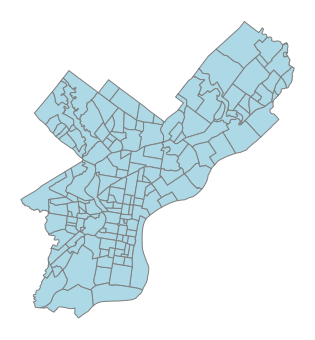

In [39]:
ax = ox.project_gdf(hoods).plot(fc="lightblue", ec="gray")
ax.set_axis_off()

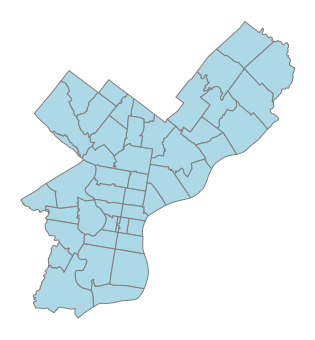

In [40]:
ax = ox.project_gdf(zip_codes).plot(fc="lightblue", ec="gray")
ax.set_axis_off()

Define functions to set the styles:

In [41]:
def get_zip_code_style(feature):
    """Return a style dict."""
    return {"weight": 2, "color": "white"}


def get_neighborhood_style(feature):
    """Return a style dict."""
    return {"weight": 2, "color": "lightblue", "fillOpacity": 0.1}


def get_highlighted_style(feature):
    """Return a style dict when highlighting a feature."""
    return {"weight": 2, "color": "red"}

### Usual Leaflet/Folium syntax

1. Create the map
2. Create your overlay layer
3. Add your overlay layer to your map

In [42]:
# Create the map
m = folium.Map(
    location=[39.99, -75.13],
    tiles='Cartodb dark_matter',
    zoom_start=11
)

# Add the ZIP Codes GeoJson to the map
folium.GeoJson(
    zip_codes.to_crs(epsg=4326).to_json(), # IMPORTANT: make sure CRS is lat/lng (EPSG=4326)
    name='Philadelphia ZIP_codes',
    style_function=get_zip_code_style,
    highlight_function=get_highlighted_style,
    tooltip=folium.GeoJsonTooltip(['ZIP Code'])
).add_to(m)


# Add a SECOND layer for neighborhoods
folium.GeoJson(
    hoods.to_crs(epsg=4326).to_json(), # IMPORTANT: make sure CRS is lat/lng (EPSG=4326)
    name='Neighborhoods',
    style_function=get_neighborhood_style,
    highlight_function=get_highlighted_style,
    tooltip=folium.GeoJsonTooltip(['neighborhood'])
).add_to(m)


# Also add option to toggle layers
folium.LayerControl().add_to(m)

m

## Important notes:

- The data should be passed as GeoJSON rather than a GeoDataFrame — you need to call `.to_json()`
- I've added a `LayerControl` to toggle different layers on the map
- I've specified a tooltip using `folium.GeoJsonTooltip`

## 3.3 Plotting a choropleth map

Overlay GeoJSON features on an interactive map, colored by a specific data variable

## At-home exercise: load data for internet availability in US counties

In the interest of time, I've used `cenpy` to download data for internet availability from the 2019 5-year ACS, but a good at-home exercise is to try to replicate my work. 

- The relevant data table is [B28002: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD](https://data.census.gov/cedsci/table?q=B28002&tid=ACSDT5Y2019.B28002&hidePreview=false)
- Columns: 
    - B28002_001E: the total universe of households
    - B28002_013E: households without internet

In [43]:
census_data = pd.read_csv("./data/internet_avail_census.csv", dtype={"geoid": str})

In [44]:
# Remove counties with no households
valid = census_data['universe'] > 0
census_data = census_data.loc[valid]

# Calculate the percent without internet
census_data['percent_no_internet'] = census_data['no_internet'] / census_data['universe']

In [45]:
census_data.head()

NAME  universe  no_internet  state  county  \
0  Washington County, Mississippi   18299.0       6166.0     28     151   
1       Perry County, Mississippi    4563.0       1415.0     28     111   
2     Choctaw County, Mississippi    3164.0       1167.0     28      19   
3    Itawamba County, Mississippi    8706.0       1970.0     28      57   
4     Carroll County, Mississippi    3658.0       1218.0     28      15   

   geoid  percent_no_internet  
0  28151             0.336958  
1  28111             0.310103  
2  28019             0.368837  
3  28057             0.226281  
4  28015             0.332969

Load counties from the data folder as well:

In [46]:
counties = gpd.read_file("./data/us-counties-10m.geojson")

In [47]:
counties.head()

id                                           geometry
0  53073  MULTIPOLYGON (((-120.85361 49.00011, -120.7674...
1  30105  POLYGON ((-106.11238 48.99904, -106.15187 48.8...
2  30029  POLYGON ((-114.06985 48.99904, -114.05908 48.8...
3  16021  POLYGON ((-116.04755 49.00065, -116.04755 48.5...
4  30071  POLYGON ((-107.17840 49.00011, -107.20712 48.9...

## Now let's make the choropleth..

## The easy way: use folium.Choropleth

- **The good:** 
    - Automatically generate a choropleth from a set of features and corresponding pandas DataFrame
    - Automatic creation of a legend
- **The bad:** 
    - no tooltip and little highlight interactivity (currently being worked on)

In [48]:
folium.Choropleth?

Steps:

1. Pass the geometry data (counties) as GeoJSON **in lat/lng CRS**
1. Pass in the census data separately
1. Pass in the column that we match the geometries on (`key_on=`), using the GeoJSON "features.properties." syntax
1. Pass the data *key* (column to match the data on) and the data *value* (the column to color the geometries by) via the `columns=` keyword

In [51]:
m = folium.Map(location=[40, -98], zoom_start=4)

# Convert the counties geometries into GeoJSON
counties_geojson = counties.to_crs(epsg=4326).to_json()

folium.Choropleth(
    geo_data=counties_geojson, # Pass in GeoJSON data for counties
    data=census_data, # the census data
    columns=["geoid", 'percent_no_internet'], # First column must be the key, second the values
    key_on="feature.properties.id", # Key to match on in the geometries --> Remember to prepend "feature.properties"
    fill_color='RdPu', # any ColorBrewer name will work here
    fill_opacity=0.7,
    line_opacity=1,
    line_weight=0.5,
    legend_name='Households without Internet (%)',
    name='choropleth',
).add_to(m)


m

## Next time: The hard way: use folium.GeoJson

- **The good:**
    - more customizable, and can add user interaction
- **The bad:**
    - requires more work
    - no way to add a legend, see [this open issue on GitHub](https://github.com/python-visualization/folium/issues/528)